# Clustering of pixels by grey values 

I will be using a dataset provided with “The Elements of Statistical Learning: 
Data Mining, Inference, and Prediction” by Trevor Hastie, Robert Tibshirani & Jerome Friedman. 

> Normalized handwritten digits, automatically scanned from envelopes by the U.S. Postal Service. The original scanned digits are binary and of different sizes and orientations; the images here have been deslanted and size normalized, resulting in 16 x 16 grayscale images (Le Cun et al., 1990).
> 
> The data are in two gzipped files, and each line consists of the digit id (0-9) followed by the 256 grayscale values.
> 
> There are 7291 training observations and 2007 test observations [...]

Sources: 
- https://web.stanford.edu/~hastie/ElemStatLearn/datasets/zip.info.txt
- https://web.stanford.edu/~hastie/ElemStatLearn/datasets/zip.test.gz
- https://web.stanford.edu/~hastie/ElemStatLearn/datasets/zip.train.gz
--- 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from itertools import repeat

## Importing and preparing the data

In [2]:
# Read CSV file into a pandas DataFrame 
# Does *not* use first line as a header, recognizes white space character as a field separator 
# see https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html 
data = pd.read_csv("data/zip.train", header=None, sep=" ")

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0,NaN
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0,NaN
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0,NaN
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,NaN
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0,NaN


As described in ```zip.info.txt``` row 0 holds the value of the integer represented by the following 256 values of gray scale. Row 257 is NaN because all lines end with a non-printing character. 

In [4]:
# Lose the last column 
del data[257]

In [5]:
"""
The int() method can *not* be applied to a pandas Series, so in ordert to 
convert the values in row 0 to integers I define and apply a lambda function.
"""

int_x = lambda x: int(x)
data.iloc[:,0] = data.iloc[:,0].apply(int_x)

In [6]:
# Check the first lines of data for the conversion
data.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,6,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,7,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


In [7]:
"""
In order to calculate descriptive values for every character 
all values for a character need to be extracted from the dataset respectively. 
For style guidelines see 
https://www.python.org/dev/peps/pep-0008/#function-and-variable-names
"""
def get_data_for_character (data, character):
    # gets all columns in the first row with a matching character 
    data_character = pd.DataFrame(data[data[0] == character]) 
    # ignore the value in the first column and return only grey values 
    grey_values = data_character.iloc[:,1:]
    return grey_values

In [8]:
# count the total n of unique values in the sample 
samples_per_character = pd.DataFrame(data.iloc[:,0].value_counts())

In [9]:
# sorts the DataFrame by the index 
samples_per_character.sort_index(inplace=True)

In [10]:
"""
On how to rename a column in a pandas Dataframe see 
» https://stackoverflow.com/questions/11346283/
Caveat: the solution provided does *not* work with an unnamed (0) column!
"""

samples_per_character.rename(columns = {0 : 'n'})

,n
0,1194
1,1005
2,731
3,658
4,652
5,556
6,664
7,645
8,542
9,644


## Univariate distribution of grey values 

Histograms for 9 adjacent pixel of character “8”

In [11]:
data_8 = get_data_for_character (data, 8)     

In [12]:
# get grey values for the nth pixel 
data_8_7 = data_8.loc[:,7]
data_8_8 = data_8.loc[:,8]
data_8_9 = data_8.loc[:,9]
data_8_23 = data_8.loc[:,23]
data_8_24 = data_8.loc[:,24]
data_8_25 = data_8.loc[:,25]
data_8_49 = data_8.loc[:,49]
data_8_50 = data_8.loc[:,50]
data_8_51 = data_8.loc[:,51]

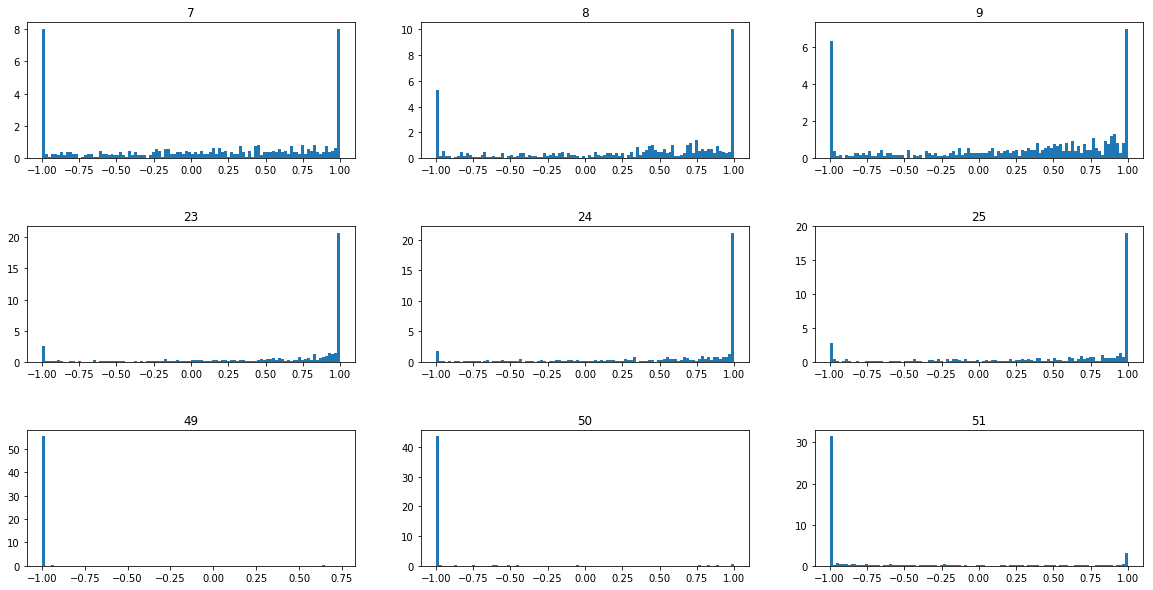

In [13]:
# set up a figure as a container 
fig = plt.figure(figsize=(20, 10))
plt.subplots_adjust(hspace=0.5)

# inject subplots 
"""
On how to set up a histogram with colors taken from colormap 
https://stackoverflow.com/questions/23061657/
"""

fig.add_subplot(3,3,1)
plt.hist(data_8.loc[:,7], 100, density=True)
plt.title('7')

fig.add_subplot(3,3,2)
plt.hist(data_8.loc[:,8], 100, density=True)
plt.title('8')

fig.add_subplot(3,3,3)
plt.hist(data_8.loc[:,9], 100, density=True)
plt.title('9')

fig.add_subplot(3,3,4)
plt.hist(data_8.loc[:,23], 100, density=True)
plt.title('23')

fig.add_subplot(3,3,5)
plt.hist(data_8.loc[:,24], 100, density=True)
plt.title('24')

fig.add_subplot(3,3,6)
plt.hist(data_8.loc[:,25], 100, density=True)
plt.title('25')

fig.add_subplot(3,3,7)
plt.hist(data_8.loc[:,49], 100, density=True)
plt.title('49')

fig.add_subplot(3,3,8)
plt.hist(data_8.loc[:,50], 100, density=True)
plt.title('50')

fig.add_subplot(3,3,9)
plt.hist(data_8.loc[:,51], 100, density=True)
plt.title('51')

plt.show()

In [14]:
data_8_stats = data_8.describe()
data_8_stats

,1,2,3,4,5,6,7,8,9,10,...,247,248,249,250,251,252,253,254,255,256
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,...,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.0
mean,-0.998502,-0.984430,-0.939161,-0.829727,-0.600395,-0.258779,0.100122,0.268923,0.213755,-0.062351,...,0.106795,0.582238,0.565945,0.078574,-0.537823,-0.856784,-0.970821,-0.995288,-0.999996,-1.0
std,0.022560,0.124416,0.251659,0.441470,0.628843,0.751873,0.730369,0.699086,0.700010,0.736820,...,0.648633,0.489660,0.499807,0.682067,0.618663,0.377583,0.156234,0.056340,0.000086,0.0
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.593500,-0.262500,-0.338250,-0.883500,...,-0.426750,0.385000,0.353500,-0.525500,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
50%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.543000,0.195500,0.478000,0.430000,0.004000,...,0.219500,0.753500,0.727000,0.151500,-0.888000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
75%,-1.000000,-1.000000,-1.000000,-1.000000,-0.339000,0.513250,0.800000,0.887000,0.853250,0.622000,...,0.646000,0.973500,0.982750,0.693750,-0.227250,-0.991750,-1.000000,-1.000000,-1.000000,-1.0
max,-0.560000,0.777000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999000,-0.035000,-0.998000,-1.0


## Extracting distinctive data points for every character 

In [26]:
"""
The function get_image_scatter will take descriptive image statistics 
(e.g. mean, median) for every pixel and point to the respective position. 
x and y correspond to the position of the pixel in the image, 
z represents the grey value of each pixel. 
Information is stored in a three-column numpy array. 
"""

def get_image_scatter(image_statistical_value):
    image_scatter = np.zeros((256, 3))
    for y in range(0,16):
        for x in range(0,16):
            pixel_pos =  x + y * 16
            image_scatter[pixel_pos][0] = x
            image_scatter[pixel_pos][1] = y
            image_scatter[pixel_pos][2] = image_statistical_value[pixel_pos + 1]
    return image_scatter

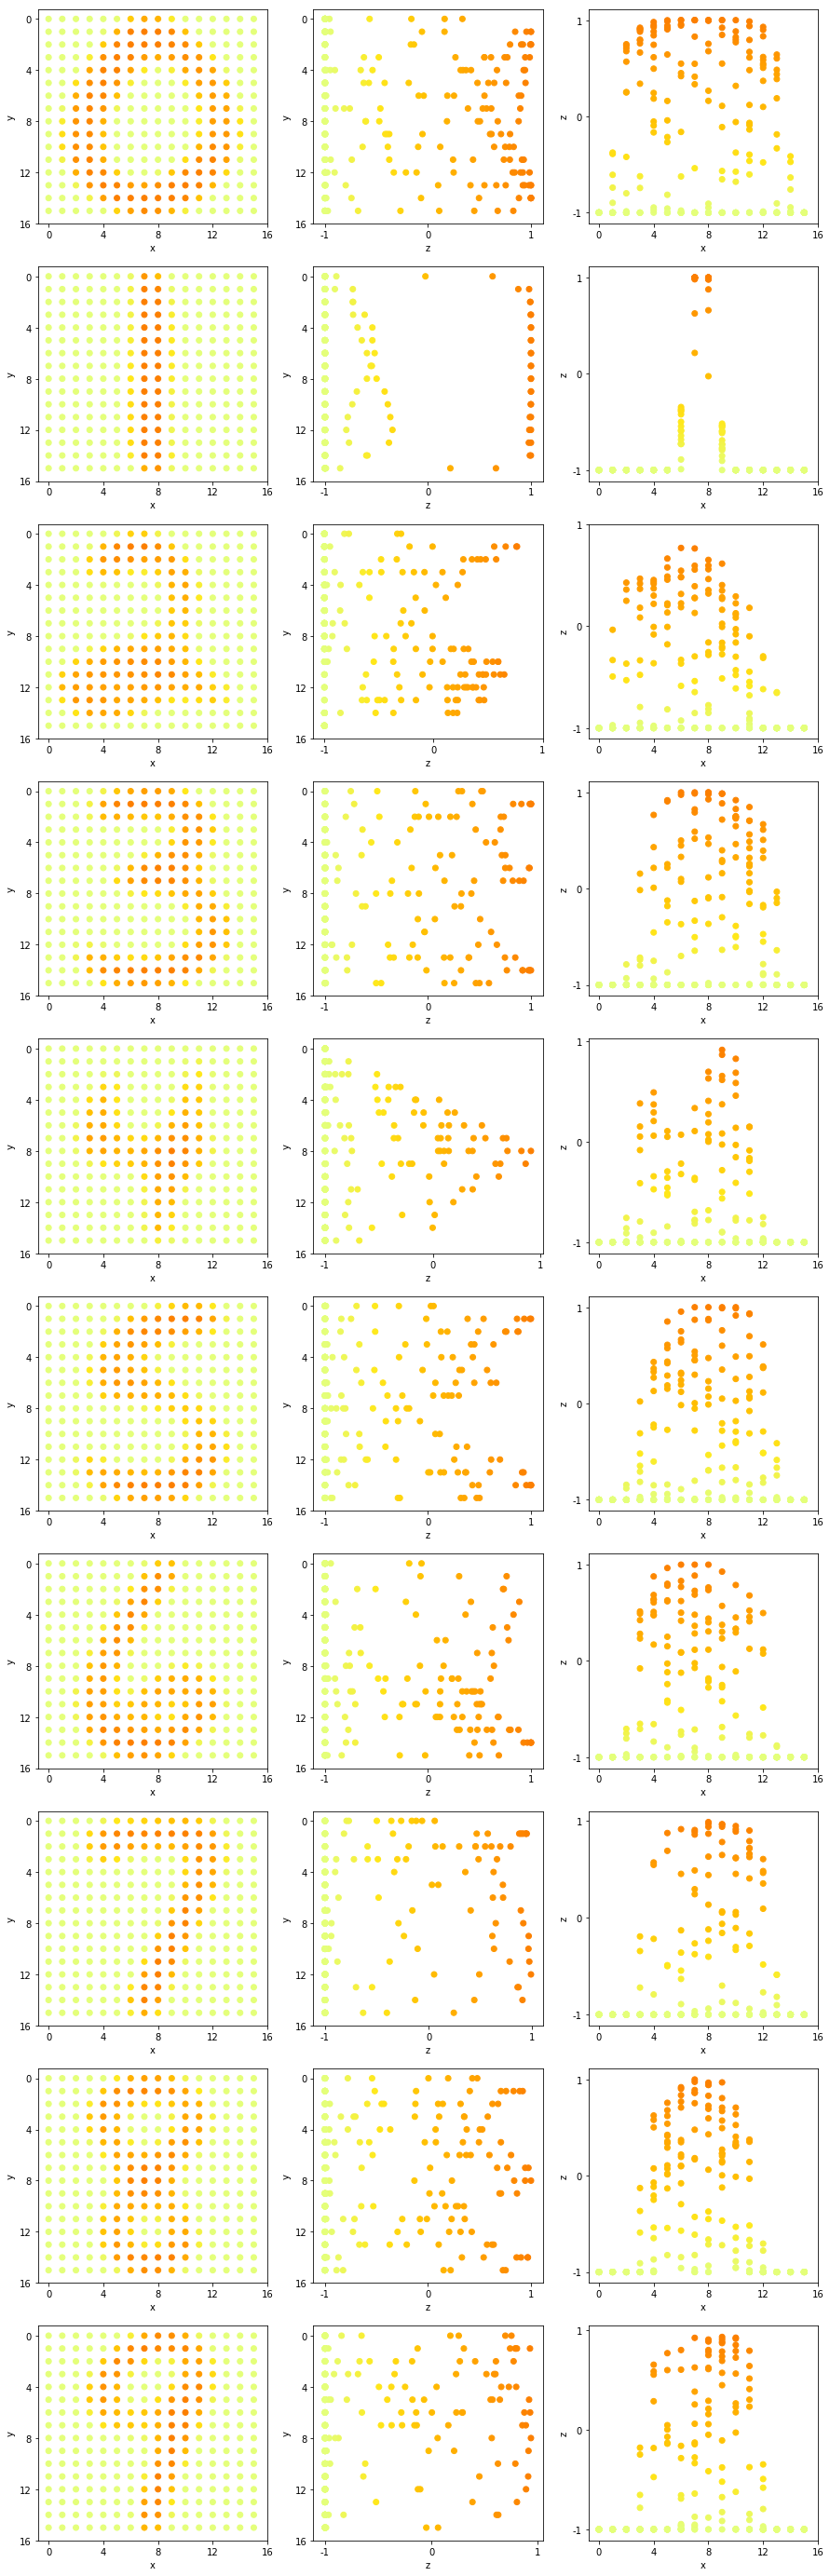

In [27]:
# set up a container figure for the subplots 
fig = plt.figure(figsize=(15, 50))

"""
For specifications of colormaps see 
- https://matplotlib.org/users/colormaps.html

On how to invert the y-axis see 
- https://stackoverflow.com/questions/18318763/
- https://matplotlib.org/api/axes_api.html
"""

for character in range(0,10):
    image_statistical_value = get_data_for_character(data, character).median()
    image_scatter = get_image_scatter(image_statistical_value)
    
    #  First subplot
    ax = fig.add_subplot(10, 3, (3 * character) + 1)
    plt.scatter(image_scatter[:,0], image_scatter[:,1], c=image_scatter[:,2], cmap='Wistia') 
    plt.xlabel('x')
    plt.ylabel('y')
    xticks_val = [0, 4, 8, 12, 16] 
    xticks_lab = ['0', '4', '8', '12', '16'] 
    yticks_val = [0, 4, 8, 12, 16] 
    yticks_lab = ['0', '4', '8', '12', '16'] 
    plt.xticks(xticks_val, xticks_lab)
    plt.yticks(yticks_val, yticks_lab)
    ax.invert_yaxis()
    
    # Second subplot
    ax = fig.add_subplot(10, 3, (3 * character) + 2)
    plt.scatter(image_scatter[:,2], image_scatter[:,1], c=image_scatter[:,2], cmap='Wistia') 
    plt.xlabel('z')
    plt.ylabel('y')
    zticks_val = [-1, 0, 1] 
    zticks_lab = ['-1', '0', '1'] 
    yticks_val = [0, 4, 8, 12, 16] 
    yticks_lab = ['0', '4', '8', '12', '16'] 
    plt.xticks(zticks_val, zticks_lab)
    plt.yticks(yticks_val, yticks_lab)
    ax.invert_yaxis()
    
    # Third subplot
    ax = fig.add_subplot(10, 3, (3 * character) + 3)
    plt.scatter(image_scatter[:,0],image_scatter[:,2], c=image_scatter[:,2], cmap='Wistia') 
    plt.xlabel('x')
    plt.ylabel('z')
    xticks_val = [0, 4, 8, 12, 16] 
    xticks_lab = ['0', '4', '8', '12', '16'] 
    zticks_val = [-1, 0, 1] 
    zticks_lab = ['-1', '0', '1'] 
    plt.xticks(xticks_val, xticks_lab)
    plt.yticks(zticks_val, zticks_lab)
        
plt.show()

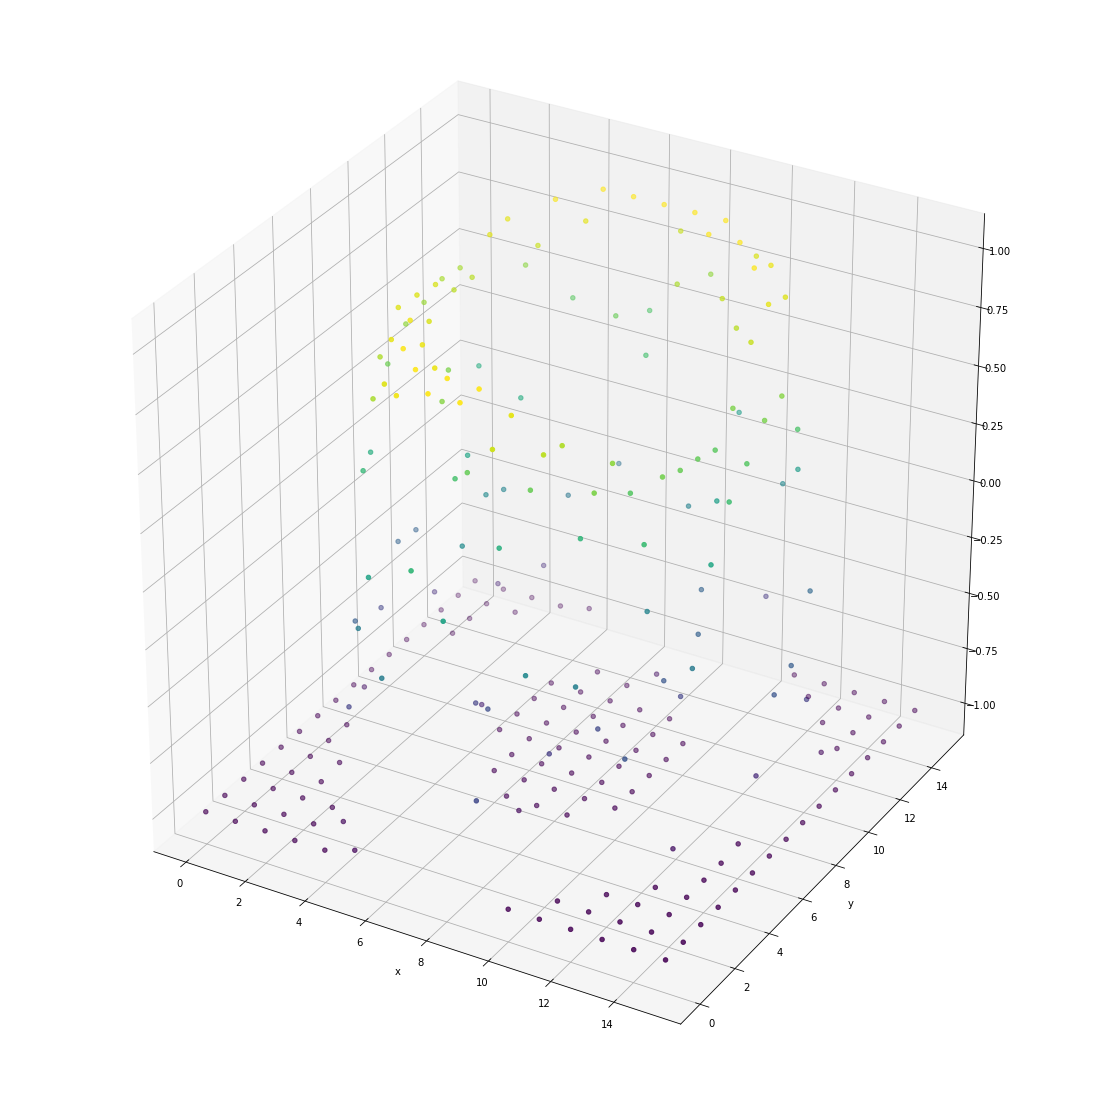

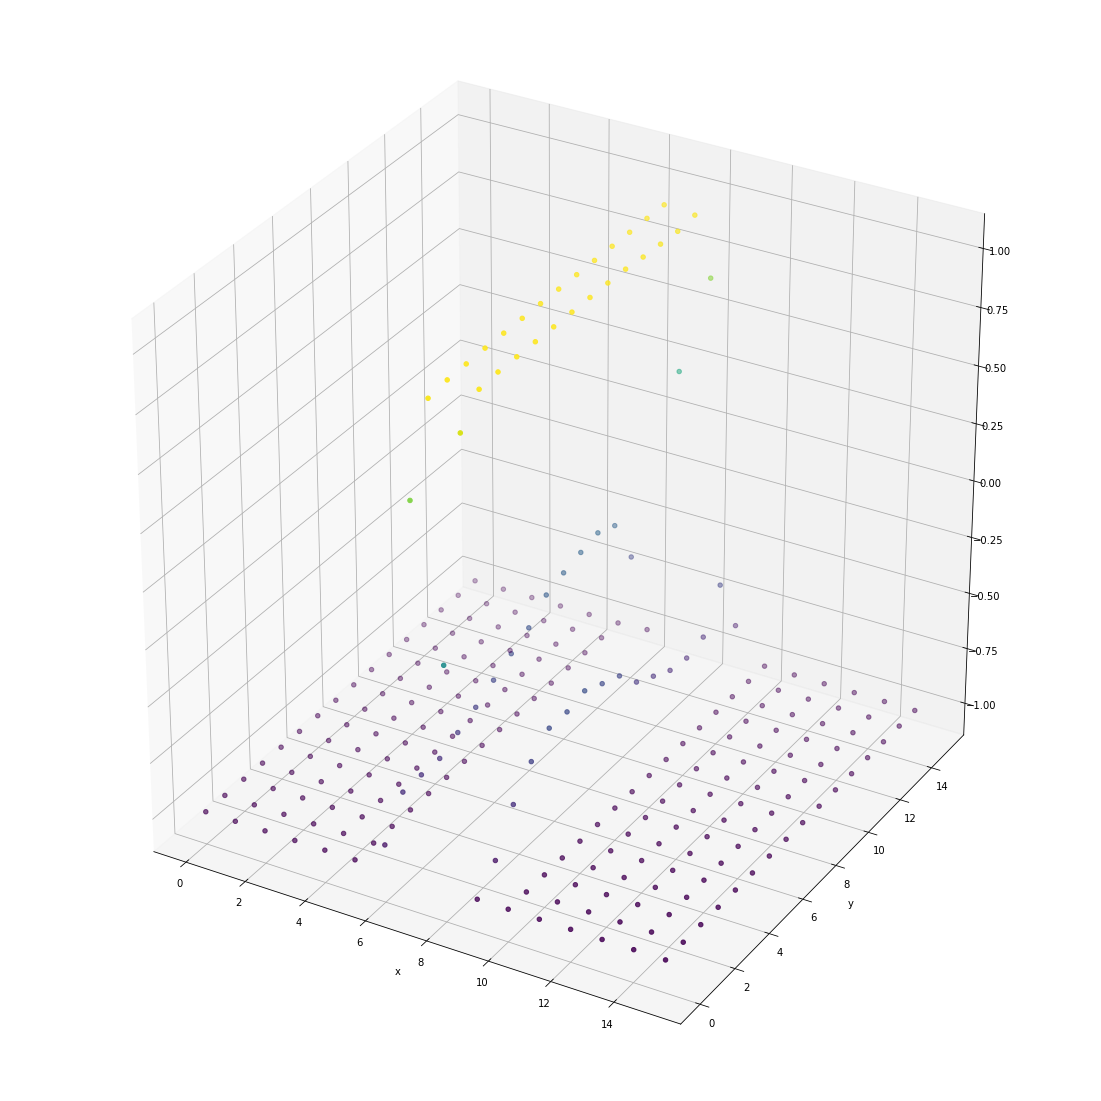

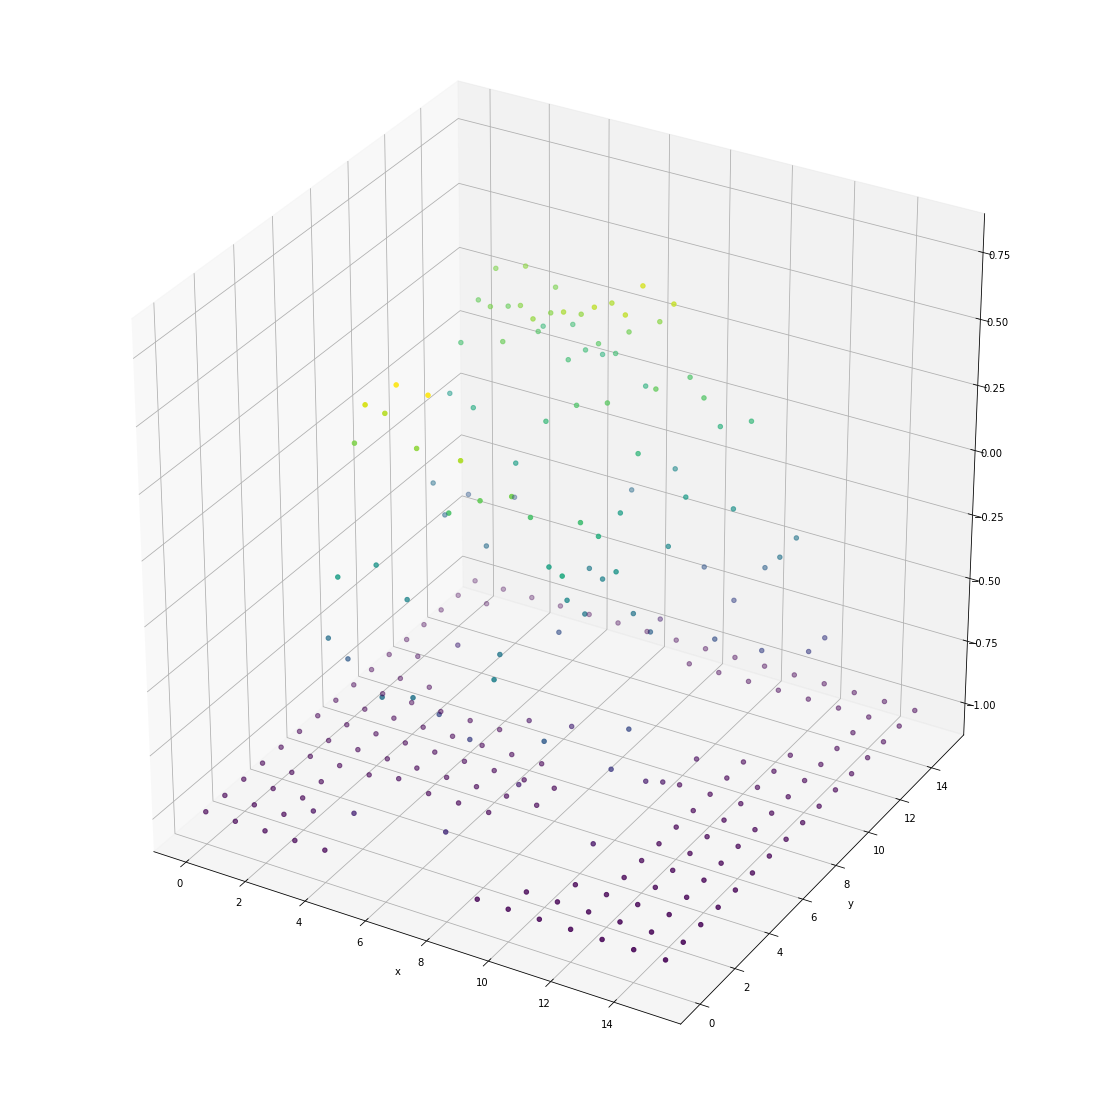

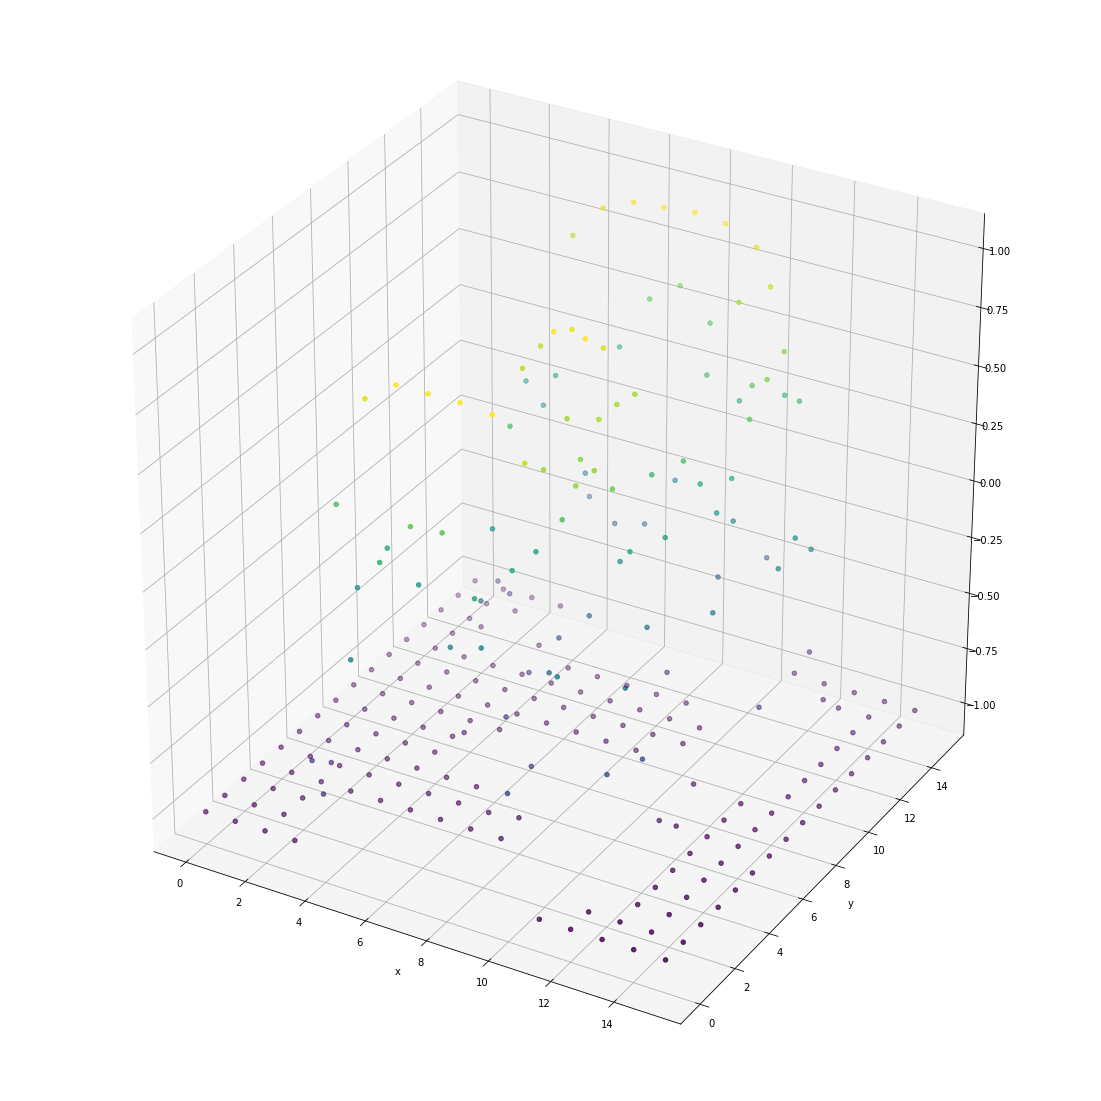

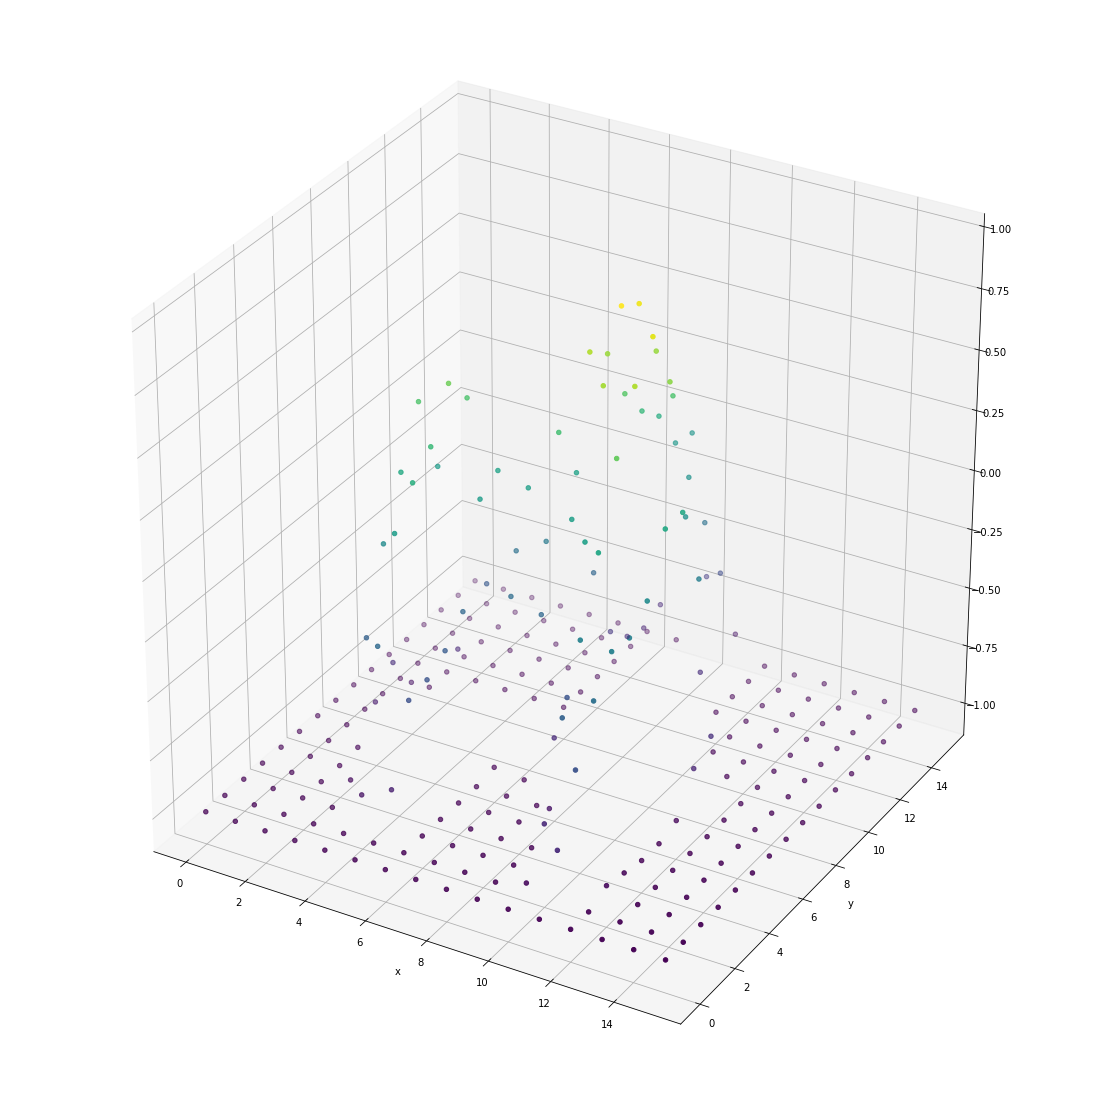

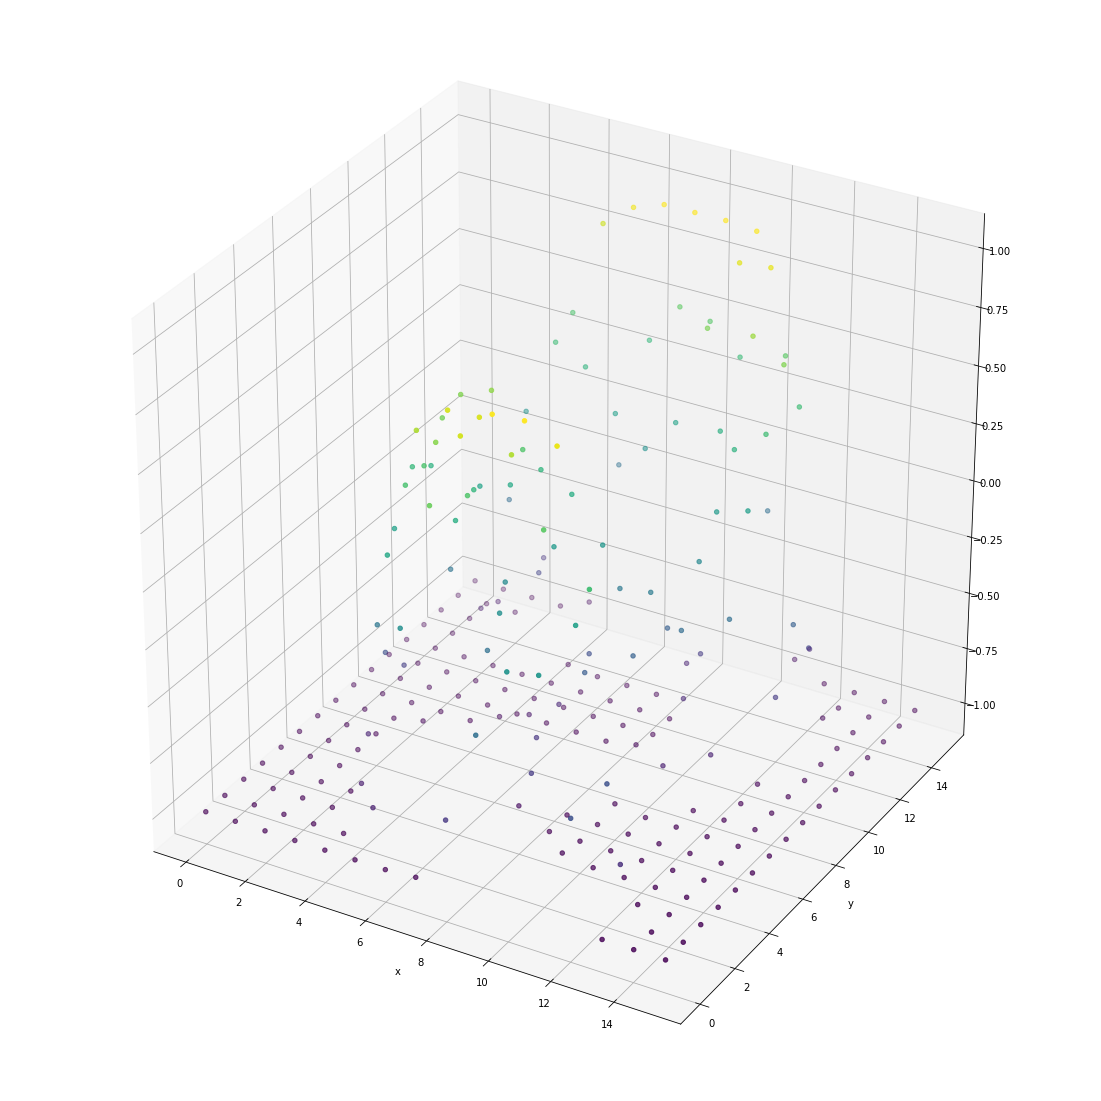

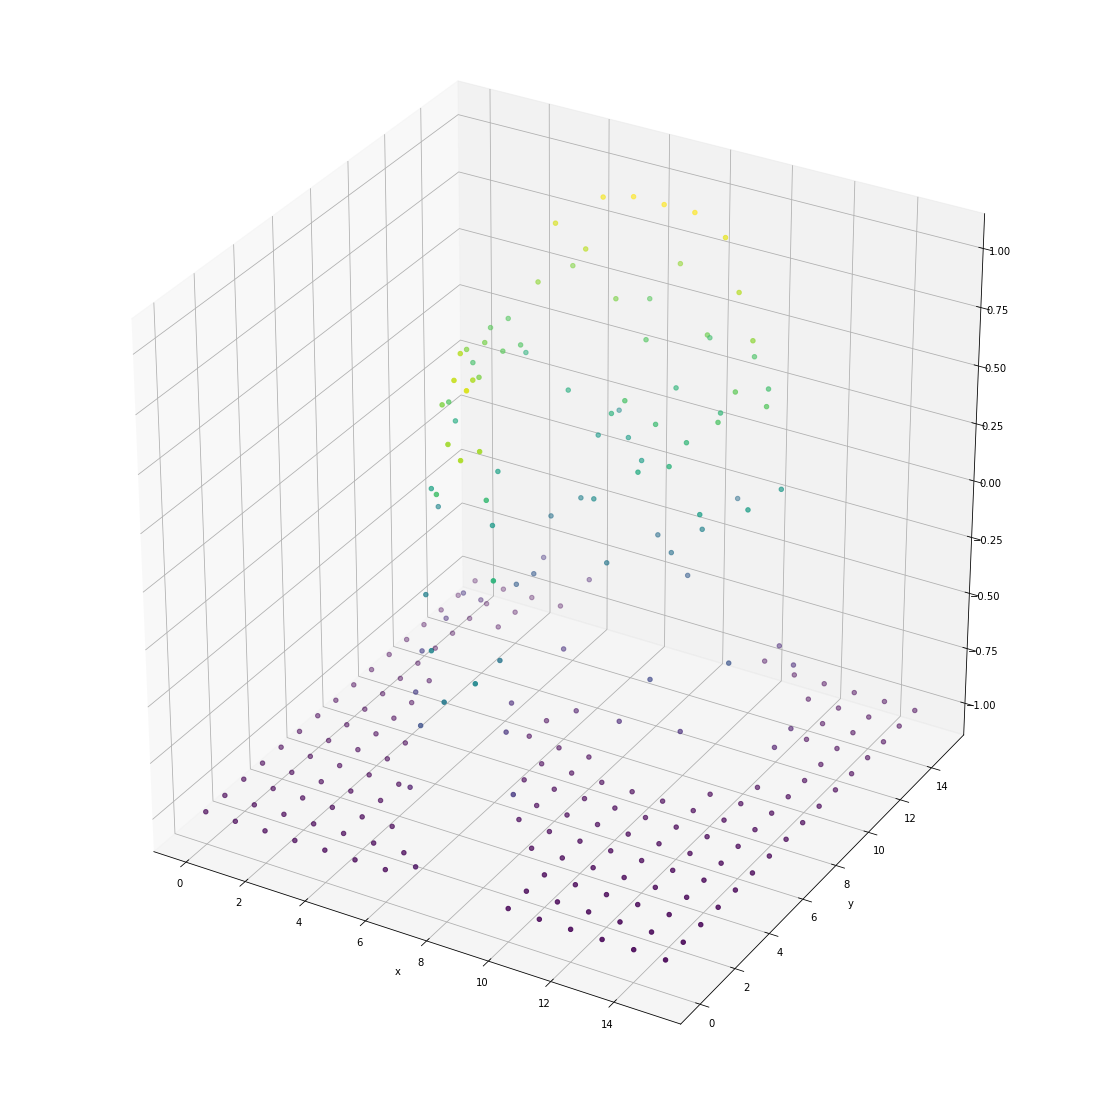

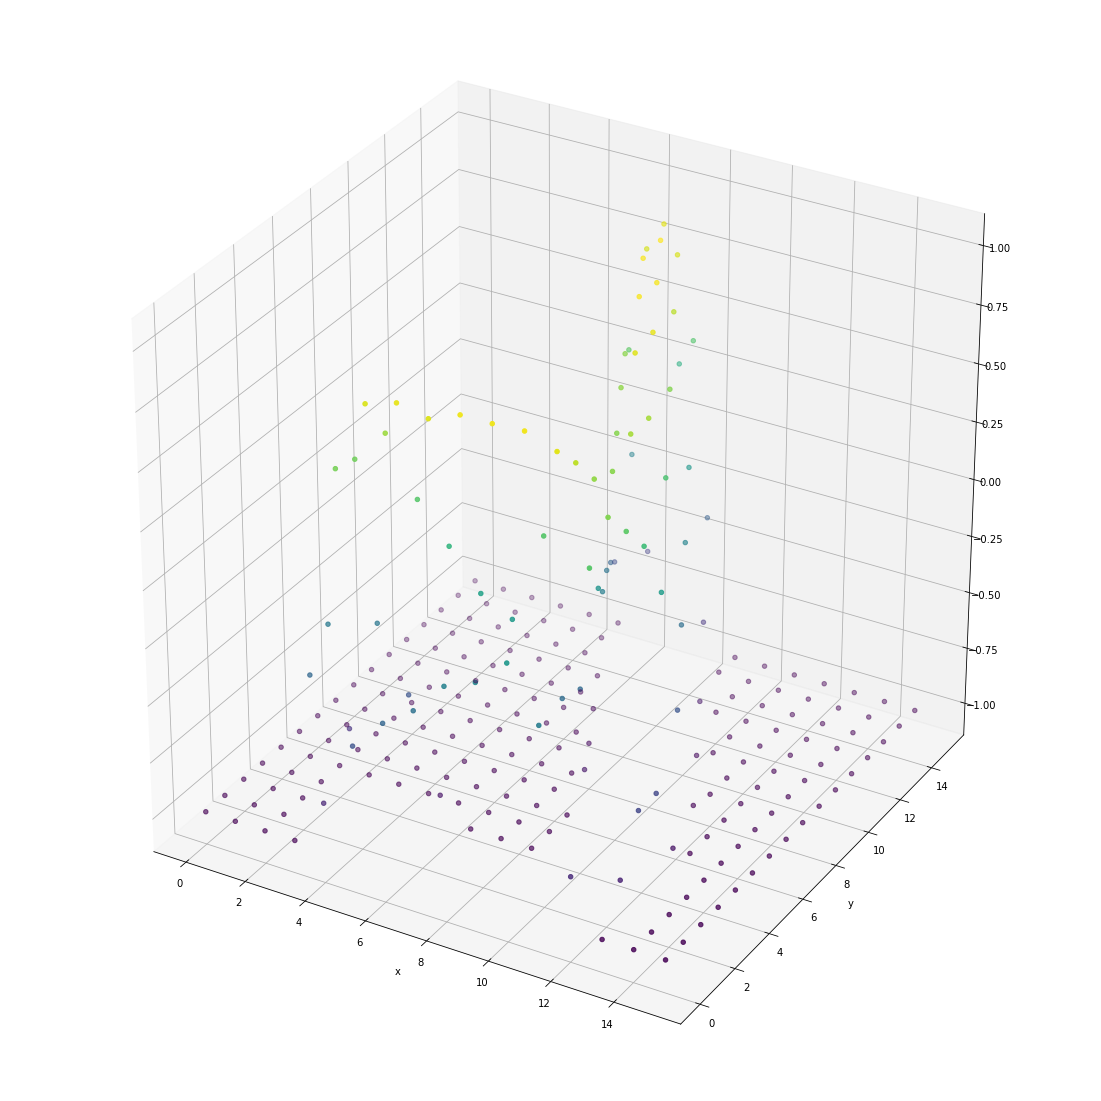

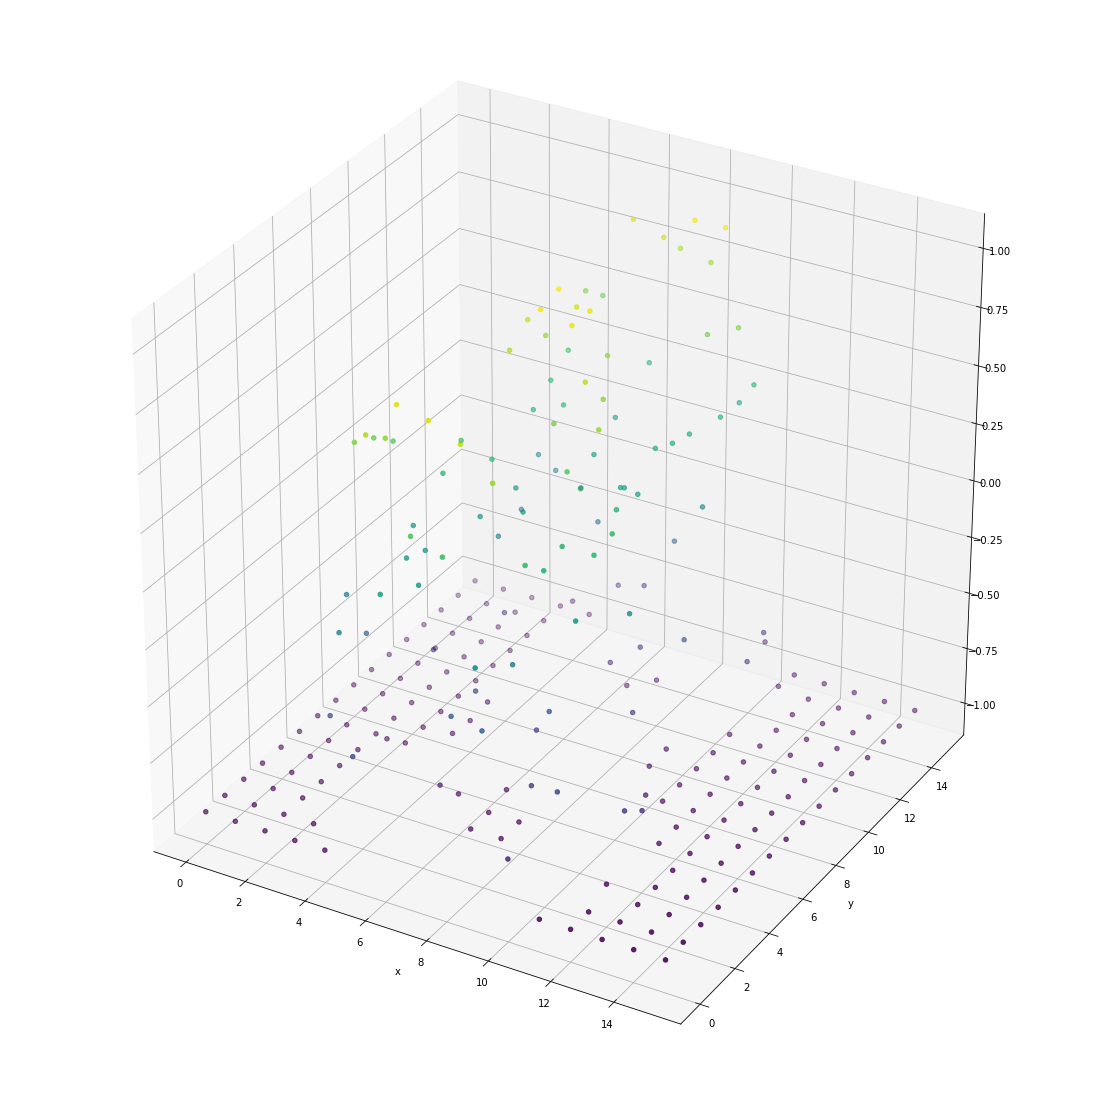

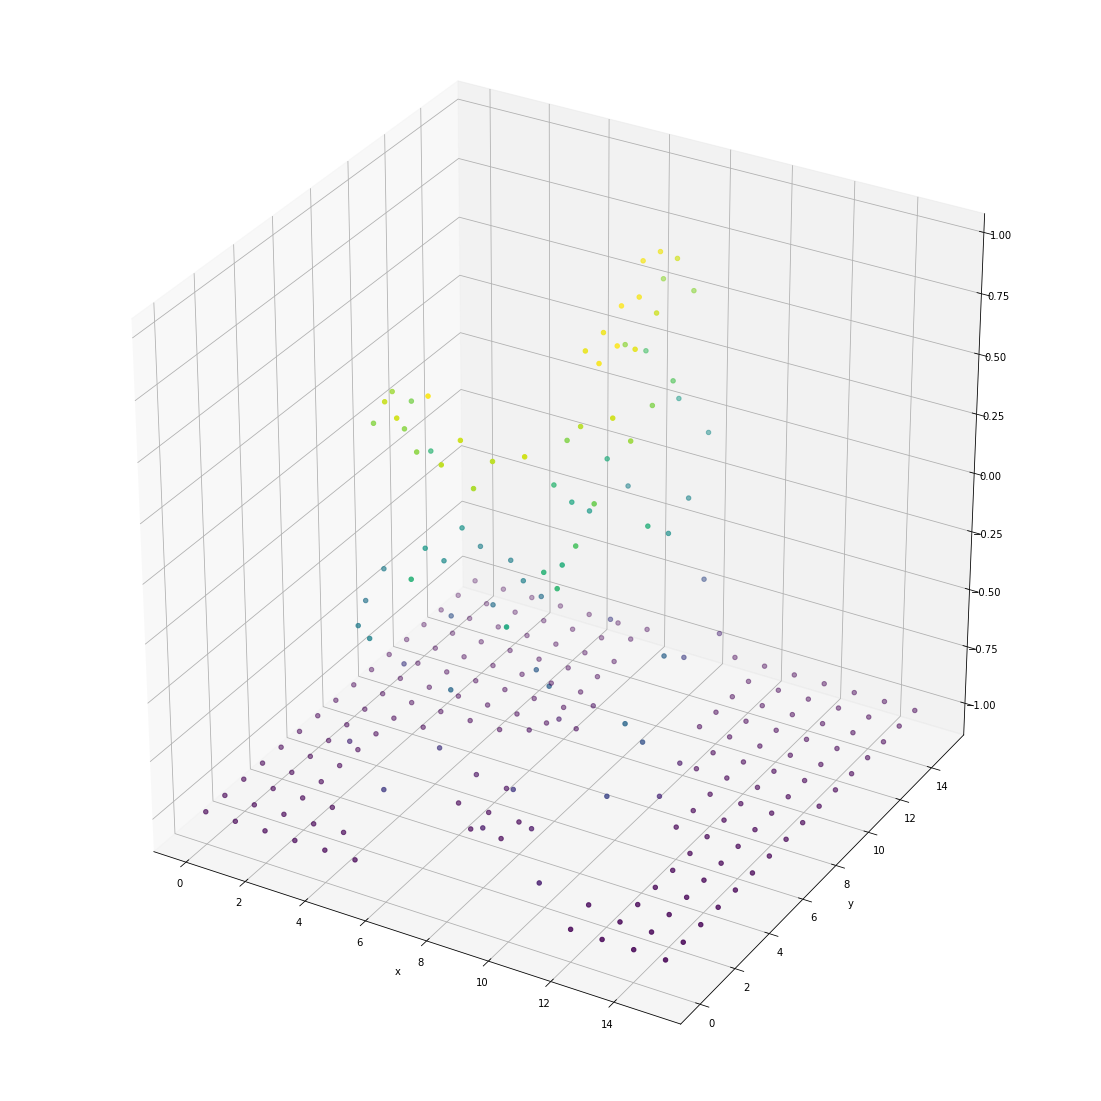

In [17]:
for character in range(0,10):
    image_description = get_data_for_character(data, character).median()
    image_scatter = get_image_scatter(image_description)
    
    # Plotting 3D projection 
    fig = plt.figure(figsize=(15, 15))
    ax = Axes3D(fig)

    ax.scatter(image_scatter[:,0], image_scatter[:,1], image_scatter[:,2], c=image_scatter[:,2])
    plt.xlabel('x')
    plt.ylabel('y')

plt.show()

In [20]:
# Computing clusters with KMeans 
kmeans = KMeans(n_clusters=10, random_state=0).fit(data)

In [21]:
data_['cluster_id'] = kmeans.predict(data)

NameError: name 'data_' is not defined

In [ ]:
# matrix = np.zeros((5000,3))
# matrix[:,0] = dataset.iloc[:,0].values
# matrix[:,1] = dataset.iloc[:,1].values
# matrix[:,2] = dataset.iloc[:,2].values
# gmm = GaussianMixture(n_components=8).fit(matrix)
# dataset[‘GMM_cluster_nr’] = labels = gmm.predict(matrix)